# Demonstration of the Central Limit Theorem

This notebook demonstrates how distributions of sample means converge to form normal distributions for sufficiently large sample sizes (N)

In [1]:
#  Load packages
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display
from scipy import stats

First, we need some data to work with.

In [3]:
#  We are going to draw samples of data from three different distribtions.
#  Each sample is of size N0

N0 = 10000000
xinc = np.arange(-10,10,.01) #  bin size

#  We are drawing large samples from a log-normal, a uniform 
#   and a normal distribution.

Rorange= np.random.lognormal(0.,2.,size=(N0,))
Rblue = np.random.uniform(-5.,5.,size=(N0,))
Rblack = np.random.normal(0,1,size = (N0,))

Let's compute the histograms and plot the PDFs of each of these data sets to see what they look like.

In [4]:
#  Calculate histograms

hl = np.histogram(Rorange,xinc)
hu = np.histogram(Rblue,xinc)
hn = np.histogram(Rblack,xinc)

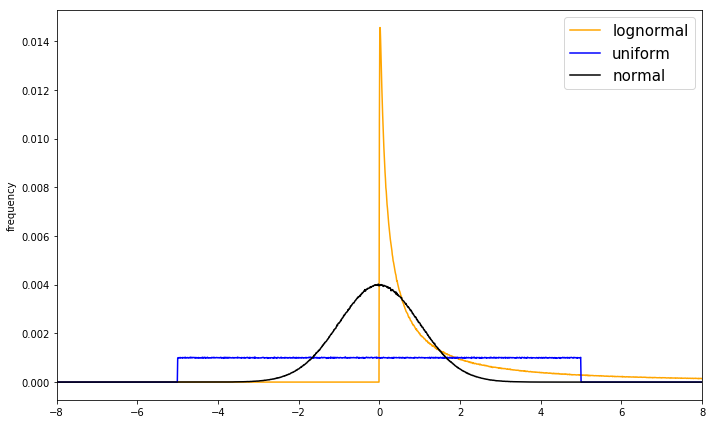

In [5]:
#  Plot the PDFs (in terms of frequency)

plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlim(-8,8)

#  Plot log-normal distribution
plt.plot(hl[1][:-1],hl[0]/N0,'-',color='orange', label='lognormal')

#  Plot uniform distribution
plt.plot(hu[1][:-1],hu[0]/N0,'-',color='blue',label = 'uniform')

#  Plot normal distribution
plt.plot(hn[1][:-1],hn[0]/N0,'-',color='black', label = 'normal')

#  Add a legened
plt.legend(fontsize = 15)
plt.tight_layout()

For our demonstration of the CLT, let's start with the normal distribution.

What we are going to do is sample the normal distribution with different sampel sizes, compute the mean for each sample, store it and repeat 10,000 times. We will then plot the distribution of these sample means and see what it looks like.

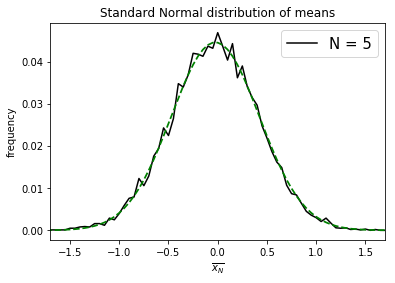

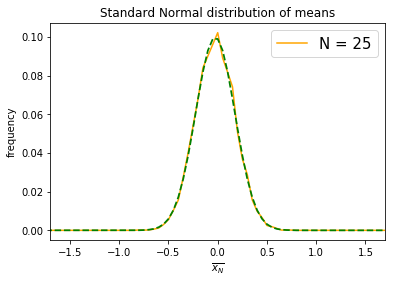

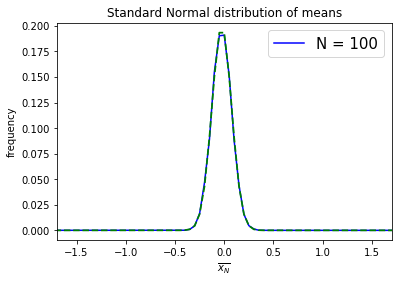

In [6]:
# Demonstration of the CLT using the normal distribution

bin_width = .05  #  for histogram calculation

j = 2 #  This is simply the figure number

#  Loop over three different sample sizes N =5, 25 and 100
for N in (5, 25, 100):  

    samples = []

    #  set colours for plotting
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'orange'
    elif(N==100):
        clr = 'blue'

    #  Using a loop, draw a sample of N values from the normal distribution 10,000 times
    for i in np.arange(0,10000):
        samples.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))

    # calc histograms
    bins = np.arange(-8,8,bin_width)
    samples_hist, x = np.histogram(samples,bins = bins)

    x = bins[0:-1]
    plt.figure(j)  #  figure number j
    #  Plot distribution of samples
    plt.plot(x,samples_hist/len(samples), color = clr, label = 'N = ' + str(N))
    #  Plot true normal distribution using stats.norm.pdf()
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), color = 'green', linestyle = '--', linewidth = 1.75)
    j += 1

    #  Make the plot look nice!
    plt.xticks(np.arange(-10,10,2))
    plt.xticks(np.arange(-2,2,.5))
    plt.xlim(-1.7,1.7)
    plt.xlabel(r'$\overline{x_N}$')
    plt.ylabel('frequency')
    plt.legend(fontsize = 15)
    plt.title('Standard Normal distribution of means')

What happens as N increases? 

The distribution of sample means converges to a normal distribution!

This was a bit of an easy test given that we were drawing samples from a normal distribution. Does the CLT still work when samples are drawn from non-normal distributions? It should. Let's see.

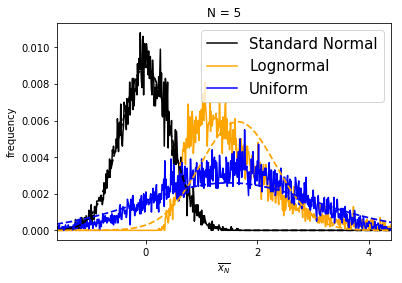

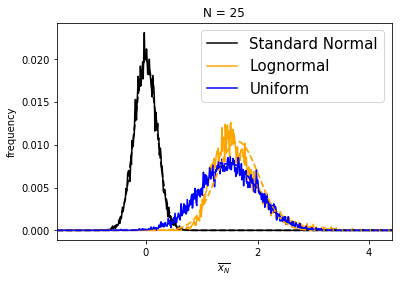

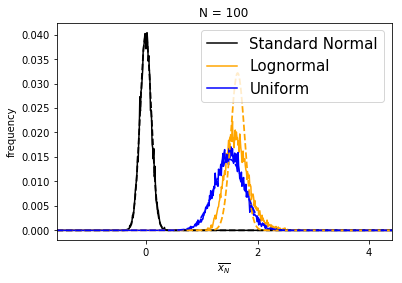

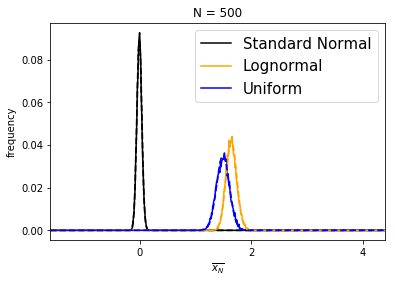

In [6]:
# Demonstration of the CLT using the normal distribution
bin_width = .01
k = 10

#  Loop over four different sample sizes N =5, 25, 100 and 500
for N in (5, 25, 100, 500):

    y1, y2, y3, y4 = [], [], [], []

    #  Using a loop, draw a sample of N values from three distributions 10,000 times
    for i in np.arange(0,10000):
        y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))
        y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))
        y4.append(np.mean(np.random.uniform(low = -3, high = 6, size = N)))


    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
    sigma_y4 = np.std(np.random.uniform(low = -3, high = 6, size = N))

    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y2hist, x = np.histogram(y2,bins = bins)
    y3hist, x = np.histogram(y3,bins = bins)
    y4hist, x = np.histogram(y4,bins = bins)

    x = bins[0:-1]
    
    #  Plot distributions of sample means
    plt.figure(k)
    plt.plot(x,y2hist/len(y2), color = 'black', label = 'Standard Normal')
    plt.plot(x,y3hist/len(y3),  color = 'orange', label = 'Lognormal')
    plt.plot(x,y4hist/len(y4), color = 'blue', label = 'Uniform')
    k += 1

    #  Plot true normal distributions for given mean and standard deviation
    if (N >= 0):
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y2), scale = 1./np.sqrt(N)), 
                 color = 'black', linestyle = '--', linewidth = 1.75)
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), 
                 color = 'orange', linestyle = '--', linewidth = 1.75)
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y4), scale = sigma_y4/np.sqrt(N)), 
                 color = 'blue', linestyle = '--', linewidth = 1.75)

    #  Make the plot look nice!
    plt.legend(fontsize = 15)
    plt.xticks(np.arange(-10,10,2))
    plt.xlim(-1.6,4.4)
    plt.xlabel(r'$\overline{x_N}$')
    plt.ylabel('frequency')
    plt.title('N = ' + str(N))
    plt.legend(fontsize = 15)